In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.patches as mpatches
import geopandas
# from plotnine import *

# Load from CSV

In [2]:
df = pd.read_csv("Consumer_Complaints.csv", header=0, low_memory=False)

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,10/01/2019,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,NaN,Company believes it acted appropriately as aut...,"Atlas Credit Company, Inc.",TX,75703,NaN,Consent not provided,Web,10/01/2019,Closed with explanation,Yes,NaN,3391722
1,10/01/2019,Debt collection,Other debt,False statements or representation,Attempted to collect wrong amount,NaN,Company has responded to the consumer and the ...,"ProCollect, Inc",TX,79936,Servicemember,Consent not provided,Web,10/01/2019,Closed with explanation,Yes,NaN,3391649
2,10/01/2019,Debt collection,Auto debt,Written notification about debt,Notification didn't disclose it was an attempt...,NaN,NaN,NAVY FEDERAL CREDIT UNION,CA,91915,NaN,NaN,Web,10/01/2019,In progress,Yes,NaN,3391379
3,10/01/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,OKLAHOMA STUDENT LOAN AUTHORITY,IN,47130,NaN,NaN,Web,10/01/2019,Closed with explanation,Yes,NaN,3391378
4,10/01/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company disputes the facts presented in the co...,"Eastern Account Systems of Connecticut, Inc.",CT,06401,NaN,Other,Web,10/01/2019,Closed with explanation,Yes,NaN,3391434


In [5]:
len(df[~pd.isna(df['Consumer complaint narrative'])])/len(df)

0.31909614132781633

### insight: only 32% of the dataset has a consumer narrative
- is there meaning in the complaints that lack narrative? what drives people to leave a detailed complaint?

In [6]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
df.columns=['date_received', 'product', 'subproduct', 'issue', 'subissue',
       'consumer_narrative', 'company_response', 'company',
       'state', 'zip', 'tags', 'consumer_consent',
       'submission_via', 'date2company', 'company_response',
       'timely_response', 'consumer_disputed', 'complaint_id']

In [8]:
df['has_narrative'] = (df[df.columns[5]].notnull()).astype(int)

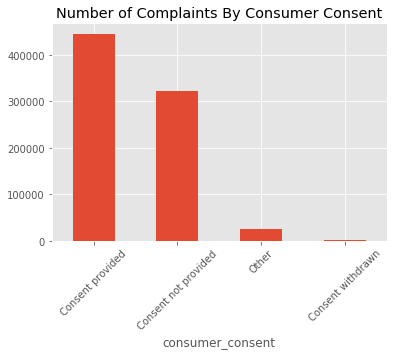

In [12]:
df.reset_index().groupby('consumer_consent')['complaint_id'].agg('count') \
    .sort_values(ascending=False).plot(kind='bar', title='Number of Complaints By Consumer Consent', y="Count", rot=45)

In [18]:
consumer_consent_df

,consumer_consent,complaint_id
0,Consent provided,445926
1,Consent not provided,323584
2,Other,26124
3,Consent withdrawn,1325


In [22]:
df.groupby(['has_narrative', 'consumer_consent'])['complaint_id'].agg('count')

has_narrative  consumer_consent    
0              Consent not provided    323584
               Consent provided           336
               Consent withdrawn         1325
               Other                    26124
1              Consent provided        445590
Name: complaint_id, dtype: int64

### insight: complaints that have a narrative only when consent was provided

In [25]:
df['state'].nunique()

63

In [26]:
df['state'].unique()

array(['TX', 'CA', 'IN', 'CT', 'GA', 'LA', 'PA', 'NH', 'DE', 'FL', 'WA',
       nan, 'MS', 'AL', 'NY', 'MO', 'IL', 'NV', 'UT', 'OH', 'TN', 'AZ',
       'SC', 'NM', 'ME', 'MD', 'OK', 'WI', 'DC', 'CO', 'NJ', 'NC', 'KS',
       'MI', 'OR', 'KY', 'VA', 'PR', 'MA', 'WY', 'WV', 'MN', 'MT', 'AR',
       'HI', 'SD', 'VT', 'IA', 'ID', 'NE', 'RI', 'ND', 'AP', 'AK',
       'UNITED STATES MINOR OUTLYING ISLANDS', 'VI', 'AE', 'GU', 'AA',
       'MP', 'MH', 'FM', 'AS', 'PW'], dtype=object)

### question: What or where are FM, PW, MP, MH? 
- answer: guam, marina islands, american samoa etc

In [121]:
df[df['state']=='MP'].head()

,date_received,product,subproduct,issue,subissue,consumer_narrative,company_response,company,state,zip,tags,consumer_consent,submission_via,date2company,company_response,timely_response,consumer_disputed,complaint_id,has_narrative
150708,03/14/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",MP,96950,NaN,Consent not provided,Web,03/14/2019,Closed with explanation,Yes,NaN,3179193,0
150788,03/14/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,TRANSWORLD SYSTEMS INC,MP,96950,NaN,Consent not provided,Web,03/14/2019,Closed with explanation,Yes,NaN,3179194,0
224401,11/21/2018,Debt collection,I do not know,Communication tactics,Called before 8am or after 9pm,NaN,Company can't verify or dispute the facts in t...,ERC,MP,96950,Servicemember,Consent not provided,Web,11/21/2018,Closed with explanation,Yes,NaN,3080064,0
641933,03/31/2017,Mortgage,Home equity loan or line of credit,"Loan servicing, payments, escrow account",NaN,In XX/XX/2005 I obtained a home equity mortgag...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",MP,554XX,NaN,Consent provided,Web,04/03/2017,Closed with explanation,Yes,No,2412732,1
648508,03/21/2017,Debt collection,I do not know,Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,ENCORE CAPITAL GROUP INC.,MP,63043,NaN,Consent not provided,Web,03/21/2017,Closed with non-monetary relief,Yes,No,2397378,0


In [11]:
df['product'].nunique()

18

In [127]:
print("percentage null:")
(df.isna().sum()/df.shape[0]*100).astype("int")    

percentage null


date_received          0
product                0
subproduct            16
issue                  0
subissue              39
consumer_narrative    68
company_response      63
company                0
state                  1
zip                    9
tags                  86
consumer_consent      42
submission_via         0
date2company           0
company_response       0
timely_response        0
consumer_disputed     44
complaint_id           0
has_narrative          0
dtype: int64

### insight: huge amounts of null in consumer narrative, company response, tags, consumer disputed, consumer consent

### BEFORE RUNNING THE BELOW:
very cpu intensive depending on your machine (took me 20 mins)

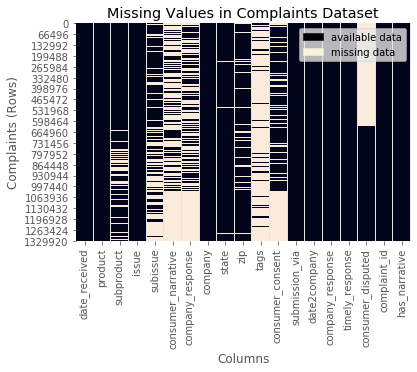

In [10]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values in Complaints Dataset")
plt.xlabel("Columns")
plt.ylabel("Complaints (Rows)")
avail = mpatches.Patch(color='black', label='available data')
missing = mpatches.Patch(color='beige', label='missing data')
plt.legend(handles=[avail, missing])

### insight: consumer disputed and subproduct very stark divide; my understanding is data is newest at the top 
does that mean something in this context?
- did they stop keeping track of consumer dispute?
- perhaps the pattern implies the consumer consent, narrative, and company resonse are newer vars since bottom quarter/third are completely missing
- subproduct does allow for "I don't know"
- tags almost completely missing. maybe only certain institutions include?

In [122]:
df['subproduct'].nunique()

76

In [123]:
df.submission_via.nunique()

6

In [124]:
df.submission_via.unique()

array(['Web', 'Postal mail', 'Phone', 'Fax', 'Referral', 'Email'],
      dtype=object)

In [125]:
df.tags.nunique()

3

In [126]:
df.tags.unique()

array([nan, 'Servicemember', 'Older American',
       'Older American, Servicemember'], dtype=object)

### insight: tags refer to special clients

In [128]:
df.issue.nunique()

166

In [138]:
df.issue.unique()[100:120]

array(['Billing disputes', 'Credit line increase/decrease',
       'Credit monitoring or identity protection',
       'Identity theft / Fraud / Embezzlement',
       'Problems when you are unable to pay',
       'Taking/threatening an illegal action', 'Other fee',
       'Incorrect/missing disclosures or info',
       'Credit card protection / Debt protection',
       'Taking out the loan or lease', "Can't repay my loan",
       'Credit decision / Underwriting', "Can't contact lender",
       'Managing, opening, or closing account', 'Transaction issue',
       'Billing statement', 'Late fee', 'Shopping for a loan or lease',
       'Improper use of my credit report', 'Rewards'], dtype=object)

### insight: lots of duplicates in the issues


In [131]:
df.company.nunique()

5417

### question: are any of the companies duplicates?

In [ ]:
df.consumer_disputed.nunique()

In [1]:
#df.company.unique()[:100]

# map

shape file from: https://catalog.data.gov/dataset/tiger-line-shapefile-2017-nation-u-s-current-state-and-equivalent-national

if find the right shape file, can get demographic info

In [21]:
by_state = df.groupby(['state'])['complaint_id'].agg('count')
usa = usa.join(by_state, on='STUSPS')
usa = geopandas.read_file("tl_2017_us_state/tl_2017_us_state.shp")
usa.rename(columns={'complaint_id':'complaints_count'}, inplace=True)

In [37]:
usa.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,complaints_count
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62265662566,489840834,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39....",3211
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138911437206,31398800291,+28.4574302,-082.4091478,"(POLYGON ((-82.987477 24.625379, -82.987477 24...",140589
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143784114293,6211277447,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64...",53741
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206229176104,18944967530,+46.3158148,-094.1996628,"POLYGON ((-96.784381 46.63050399999999, -96.78...",14354
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25150696145,6980371026,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458...",38911


In [48]:
usa = usa[(usa.STUSPS != 'AS') &
         (usa.STUSPS != 'PR') &
         (usa.STUSPS != 'MP') &
         (usa.STUSPS != 'GU') &
         (usa.STUSPS != 'AK') &
         (usa.STUSPS != 'HI') &
         (usa.STUSPS != 'VI')]

Text(0.5, 1, 'Complaints by State')

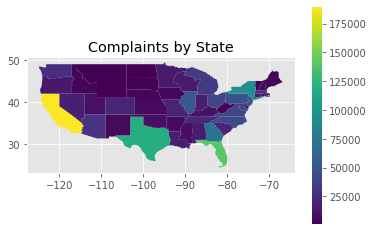

In [71]:
fig, ax = plt.subplots(1, 1)
usa.plot(column="complaints_count", ax=ax, legend=True)
plt.title("Complaints by State")

### these happen to be the biggest states; should make complaints relative to population